## Snake Game via Prompt Engineering

Giving a basic prompt to Gpt5 for snake game

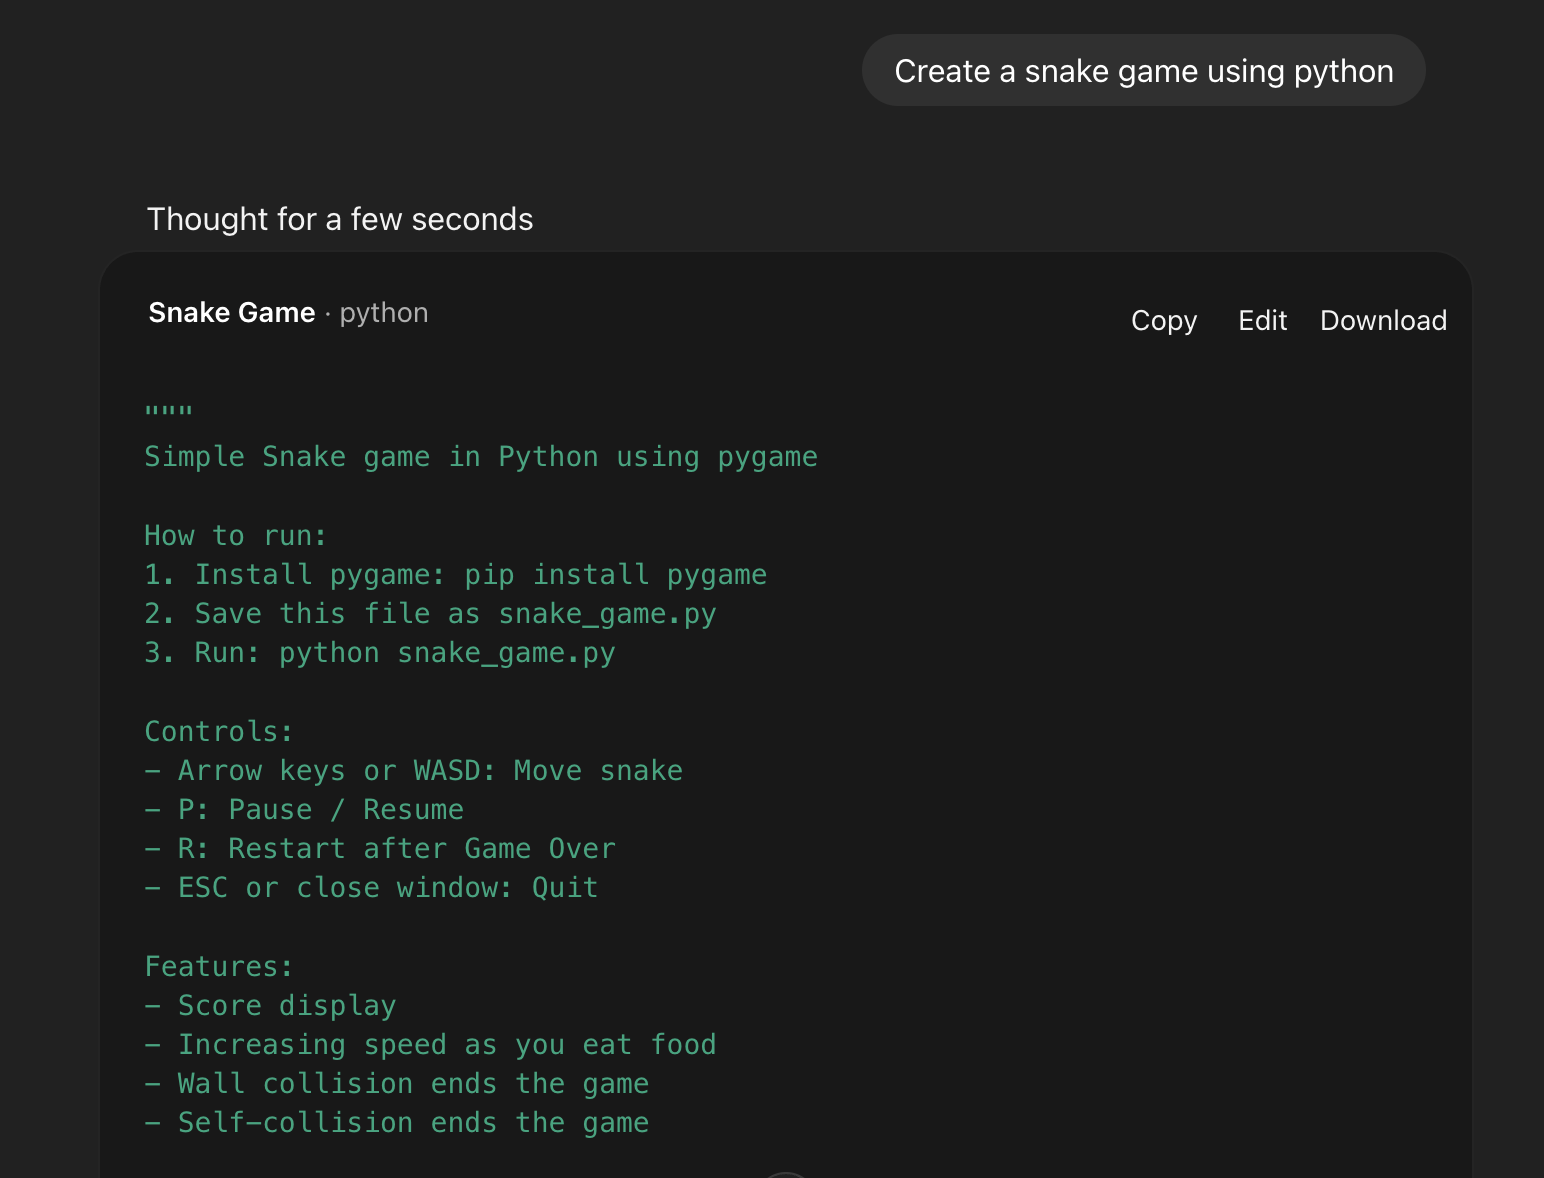

In [2]:
"""
Simple Snake game in Python using pygame

How to run:
1. Install pygame: pip install pygame
2. Save this file as snake_game.py
3. Run: python snake_game.py

Controls:
- Arrow keys or WASD: Move snake
- P: Pause / Resume
- R: Restart after Game Over
- ESC or close window: Quit

Features:
- Score display
- Increasing speed as you eat food
- Wall collision ends the game
- Self-collision ends the game

Author: ChatGPT (example)
"""

!pip install pygame
import pygame
import sys
import random

# --- Configuration ---
CELL_SIZE = 20
GRID_WIDTH = 32  # 32 * 20 = 640
GRID_HEIGHT = 24  # 24 * 20 = 480
SCREEN_WIDTH = CELL_SIZE * GRID_WIDTH
SCREEN_HEIGHT = CELL_SIZE * GRID_HEIGHT

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 200, 0)
DARK_GREEN = (0, 150, 0)
RED = (200, 0, 0)
YELLOW = (240, 200, 0)

# Initial speed (frames per second)
INITIAL_FPS = 8
FPS_INCREMENT = 0.5  # increase in fps per food

# --- Helper functions ---

def random_food_position(snake):
    """Return a food position not colliding with the snake."""
    while True:
        x = random.randint(0, GRID_WIDTH - 1)
        y = random.randint(0, GRID_HEIGHT - 1)
        if (x, y) not in snake:
            return (x, y)


def draw_cell(surface, pos, color):
    rect = pygame.Rect(pos[0] * CELL_SIZE, pos[1] * CELL_SIZE, CELL_SIZE, CELL_SIZE)
    pygame.draw.rect(surface, color, rect)


# --- Game class ---
class SnakeGame:
    def __init__(self):
        pygame.init()
        pygame.display.set_caption('Snake')
        self.screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        self.clock = pygame.time.Clock()
        self.font = pygame.font.SysFont(None, 28)
        self.big_font = pygame.font.SysFont(None, 64)
        self.reset()

    def reset(self):
        # Snake starts in the center moving right
        cx = GRID_WIDTH // 2
        cy = GRID_HEIGHT // 2
        self.snake = [(cx - i, cy) for i in range(3)]  # head is snake[0]
        self.direction = (1, 0)  # dx, dy
        self.next_direction = self.direction
        self.food = random_food_position(self.snake)
        self.score = 0
        self.fps = INITIAL_FPS
        self.game_over = False
        self.paused = False

    def handle_event(self, event):
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                pygame.quit()
                sys.exit()
            if event.key in (pygame.K_p, pygame.K_SPACE):
                self.paused = not self.paused
            if self.game_over and event.key == pygame.K_r:
                self.reset()
            # Movement keys: check to prevent reverse
            if event.key in (pygame.K_UP, pygame.K_w):
                if self.direction != (0, 1):
                    self.next_direction = (0, -1)
            elif event.key in (pygame.K_DOWN, pygame.K_s):
                if self.direction != (0, -1):
                    self.next_direction = (0, 1)
            elif event.key in (pygame.K_LEFT, pygame.K_a):
                if self.direction != (1, 0):
                    self.next_direction = (-1, 0)
            elif event.key in (pygame.K_RIGHT, pygame.K_d):
                if self.direction != (-1, 0):
                    self.next_direction = (1, 0)

    def update(self):
        if self.game_over or self.paused:
            return

        self.direction = self.next_direction
        new_head = (self.snake[0][0] + self.direction[0], self.snake[0][1] + self.direction[1])

        # Check wall collision
        if not (0 <= new_head[0] < GRID_WIDTH and 0 <= new_head[1] < GRID_HEIGHT):
            self.game_over = True
            return

        # Check self collision
        if new_head in self.snake:
            self.game_over = True
            return

        # Move snake
        self.snake.insert(0, new_head)

        # Check food
        if new_head == self.food:
            self.score += 1
            # Increase difficulty slightly
            self.fps += FPS_INCREMENT
            self.food = random_food_position(self.snake)
        else:
            self.snake.pop()

    def draw_grid(self):
        # optional: draw faint grid
        for x in range(0, SCREEN_WIDTH, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (x, 0), (x, SCREEN_HEIGHT))
        for y in range(0, SCREEN_HEIGHT, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (0, y), (SCREEN_WIDTH, y))

    def draw(self):
        self.screen.fill(BLACK)
        # self.draw_grid()

        # Draw food
        draw_cell(self.screen, self.food, RED)

        # Draw snake (head brighter)
        for i, pos in enumerate(self.snake):
            color = YELLOW if i == 0 else GREEN
            draw_cell(self.screen, pos, color)

        # Draw score
        score_surf = self.font.render(f'Score: {self.score}', True, WHITE)
        self.screen.blit(score_surf, (8, 8))

        if self.paused:
            pause_surf = self.big_font.render('PAUSED', True, WHITE)
            rect = pause_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2))
            self.screen.blit(pause_surf, rect)

        if self.game_over:
            go_surf = self.big_font.render('GAME OVER', True, WHITE)
            go_rect = go_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 - 30))
            self.screen.blit(go_surf, go_rect)

            info = self.font.render('Press R to restart or ESC to quit', True, WHITE)
            info_rect = info.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 + 30))
            self.screen.blit(info, info_rect)

        pygame.display.flip()

    def run(self):
        while True:
            for event in pygame.event.get():
                self.handle_event(event)

            self.update()
            self.draw()

            # Tick
            self.clock.tick(self.fps)


if __name__ == '__main__':
    game = SnakeGame()
    game.run()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 5.3 MB/s eta 0:00:00a 0:00:01
pygame 2.6.1 (SDL 2.28.4, Python 3.13.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


SystemExit: 

/Users/saurabhsingh/Documents/Projects/ZTM/env/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3675: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


The game ran succesfully

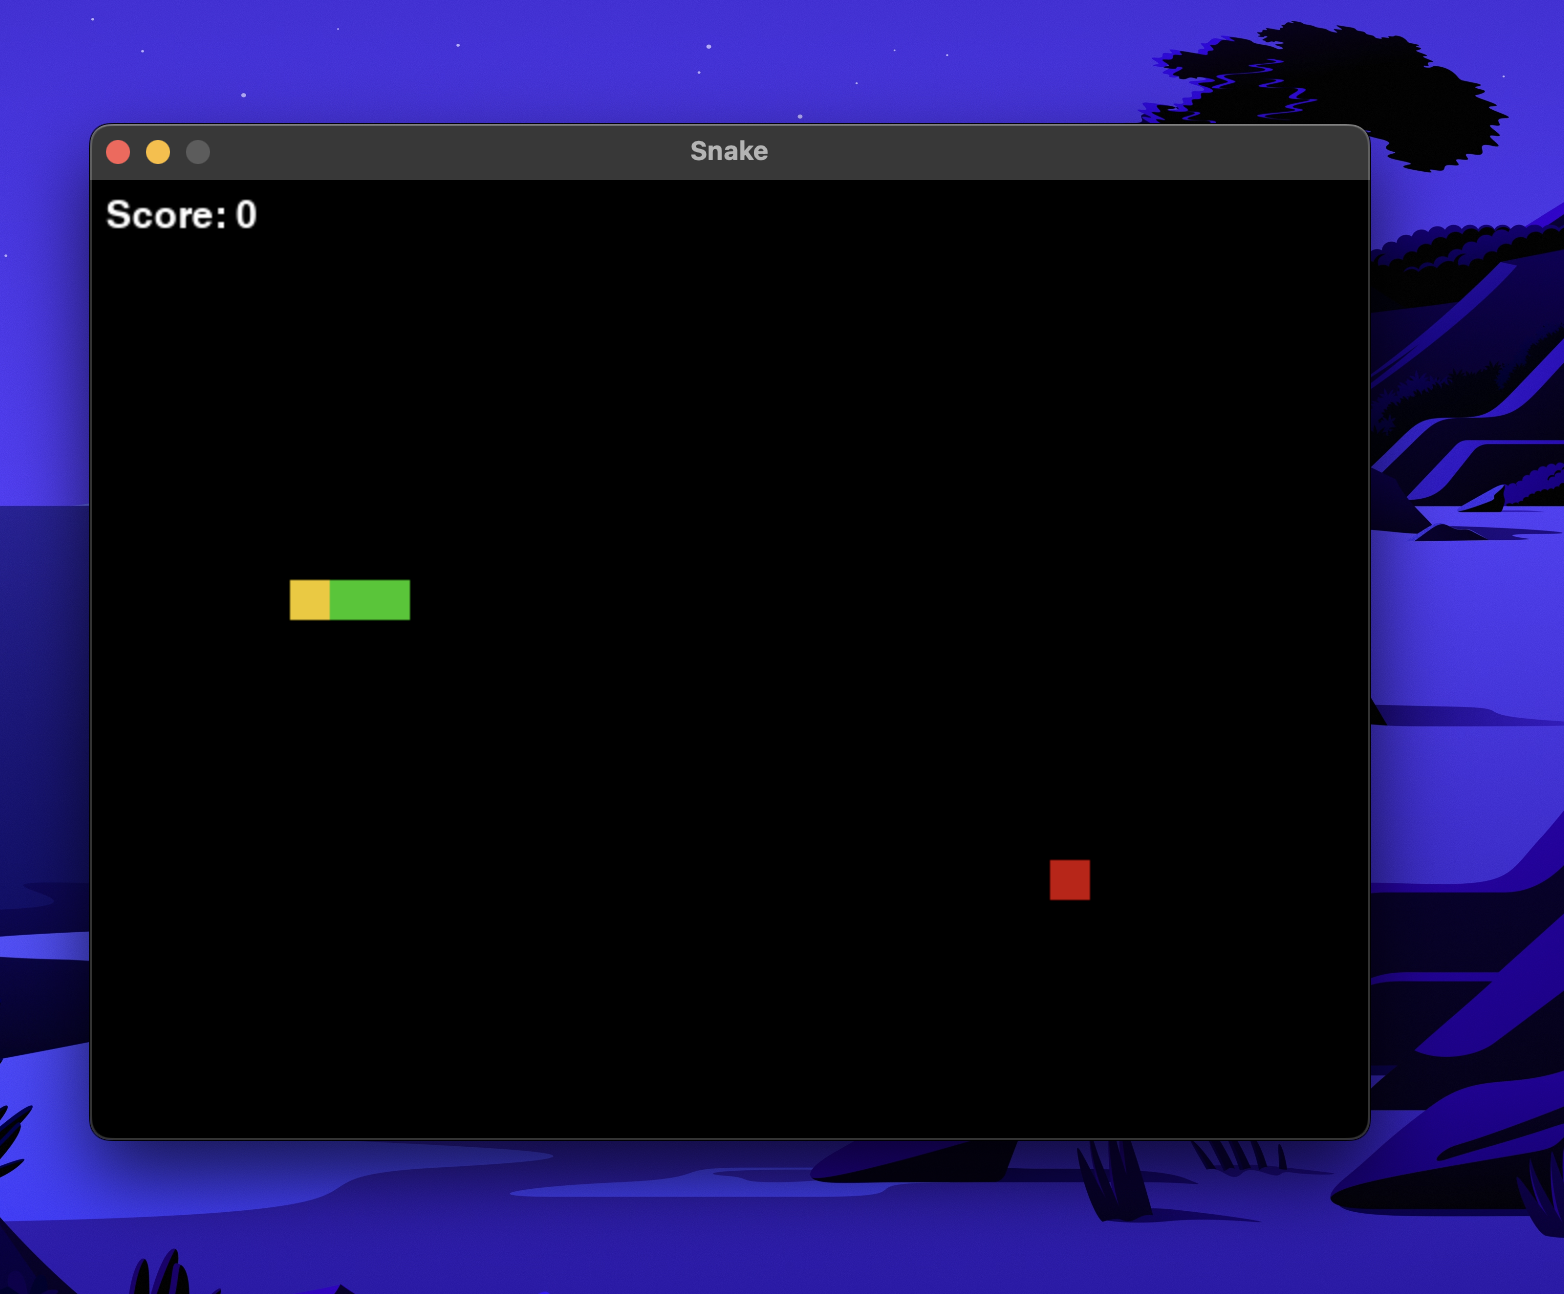

### Tweaking the prompts for better experience

Let's change the background color to purple from black

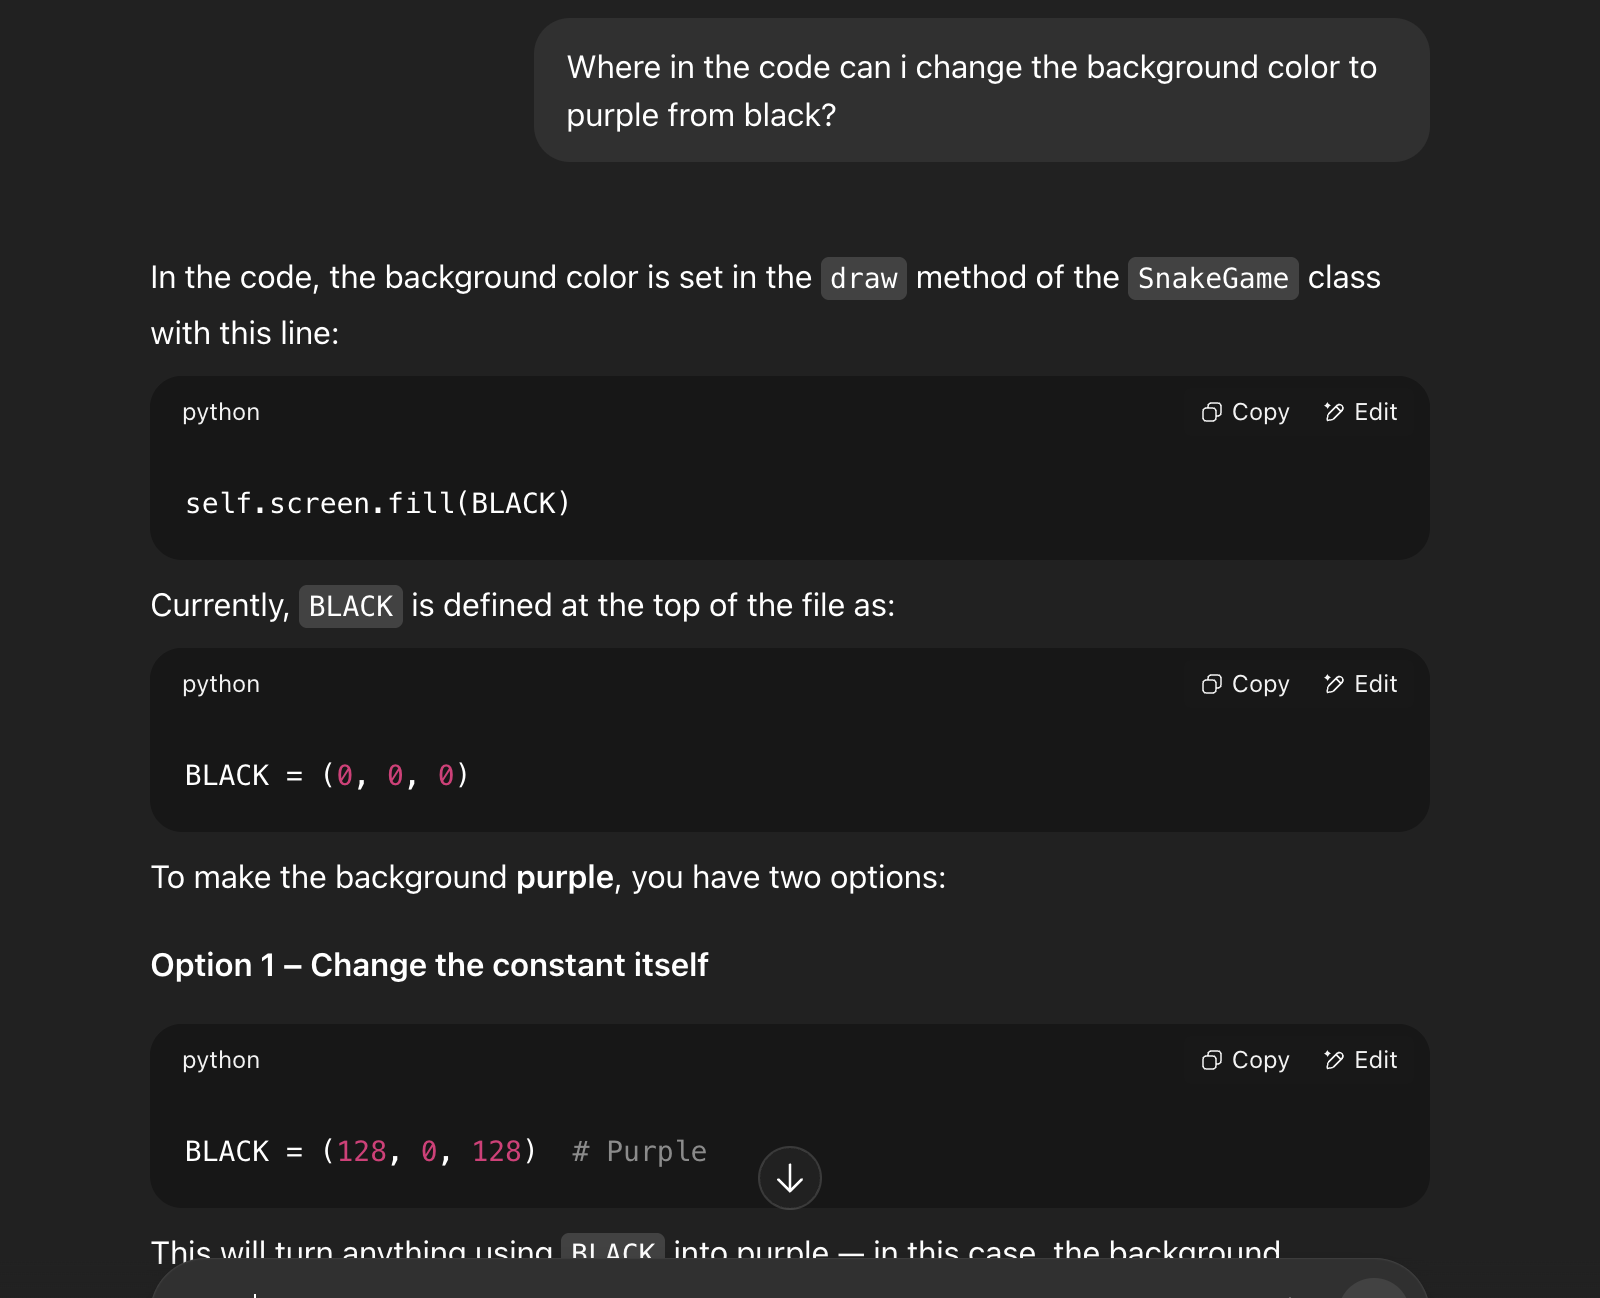

In [3]:
# changing the color to purple


import pygame
import sys
import random

# --- Configuration ---
CELL_SIZE = 20
GRID_WIDTH = 32  # 32 * 20 = 640
GRID_HEIGHT = 24  # 24 * 20 = 480
SCREEN_WIDTH = CELL_SIZE * GRID_WIDTH
SCREEN_HEIGHT = CELL_SIZE * GRID_HEIGHT

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 200, 0)
DARK_GREEN = (0, 150, 0)
RED = (200, 0, 0)
YELLOW = (240, 200, 0)

# Initial speed (frames per second)
INITIAL_FPS = 8
FPS_INCREMENT = 0.5  # increase in fps per food

# --- Helper functions ---

def random_food_position(snake):
    """Return a food position not colliding with the snake."""
    while True:
        x = random.randint(0, GRID_WIDTH - 1)
        y = random.randint(0, GRID_HEIGHT - 1)
        if (x, y) not in snake:
            return (x, y)


def draw_cell(surface, pos, color):
    rect = pygame.Rect(pos[0] * CELL_SIZE, pos[1] * CELL_SIZE, CELL_SIZE, CELL_SIZE)
    pygame.draw.rect(surface, color, rect)


# --- Game class ---
class SnakeGame:
    def __init__(self):
        pygame.init()
        pygame.display.set_caption('Snake')
        self.screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        self.clock = pygame.time.Clock()
        self.font = pygame.font.SysFont(None, 28)
        self.big_font = pygame.font.SysFont(None, 64)
        self.reset()

    def reset(self):
        # Snake starts in the center moving right
        cx = GRID_WIDTH // 2
        cy = GRID_HEIGHT // 2
        self.snake = [(cx - i, cy) for i in range(3)]  # head is snake[0]
        self.direction = (1, 0)  # dx, dy
        self.next_direction = self.direction
        self.food = random_food_position(self.snake)
        self.score = 0
        self.fps = INITIAL_FPS
        self.game_over = False
        self.paused = False

    def handle_event(self, event):
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                pygame.quit()
                sys.exit()
            if event.key in (pygame.K_p, pygame.K_SPACE):
                self.paused = not self.paused
            if self.game_over and event.key == pygame.K_r:
                self.reset()
            # Movement keys: check to prevent reverse
            if event.key in (pygame.K_UP, pygame.K_w):
                if self.direction != (0, 1):
                    self.next_direction = (0, -1)
            elif event.key in (pygame.K_DOWN, pygame.K_s):
                if self.direction != (0, -1):
                    self.next_direction = (0, 1)
            elif event.key in (pygame.K_LEFT, pygame.K_a):
                if self.direction != (1, 0):
                    self.next_direction = (-1, 0)
            elif event.key in (pygame.K_RIGHT, pygame.K_d):
                if self.direction != (-1, 0):
                    self.next_direction = (1, 0)

    def update(self):
        if self.game_over or self.paused:
            return

        self.direction = self.next_direction
        new_head = (self.snake[0][0] + self.direction[0], self.snake[0][1] + self.direction[1])

        # Check wall collision
        if not (0 <= new_head[0] < GRID_WIDTH and 0 <= new_head[1] < GRID_HEIGHT):
            self.game_over = True
            return

        # Check self collision
        if new_head in self.snake:
            self.game_over = True
            return

        # Move snake
        self.snake.insert(0, new_head)

        # Check food
        if new_head == self.food:
            self.score += 1
            # Increase difficulty slightly
            self.fps += FPS_INCREMENT
            self.food = random_food_position(self.snake)
        else:
            self.snake.pop()

    def draw_grid(self):
        # optional: draw faint grid
        for x in range(0, SCREEN_WIDTH, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (x, 0), (x, SCREEN_HEIGHT))
        for y in range(0, SCREEN_HEIGHT, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (0, y), (SCREEN_WIDTH, y))

    def draw(self):
        self.screen.fill((128, 0, 128))  # Black to purple
        # self.draw_grid()

        # Draw food
        draw_cell(self.screen, self.food, RED)

        # Draw snake (head brighter)
        for i, pos in enumerate(self.snake):
            color = YELLOW if i == 0 else GREEN
            draw_cell(self.screen, pos, color)

        # Draw score
        score_surf = self.font.render(f'Score: {self.score}', True, WHITE)
        self.screen.blit(score_surf, (8, 8))

        if self.paused:
            pause_surf = self.big_font.render('PAUSED', True, WHITE)
            rect = pause_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2))
            self.screen.blit(pause_surf, rect)

        if self.game_over:
            go_surf = self.big_font.render('GAME OVER', True, WHITE)
            go_rect = go_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 - 30))
            self.screen.blit(go_surf, go_rect)

            info = self.font.render('Press R to restart or ESC to quit', True, WHITE)
            info_rect = info.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 + 30))
            self.screen.blit(info, info_rect)

        pygame.display.flip()

    def run(self):
        while True:
            for event in pygame.event.get():
                self.handle_event(event)

            self.update()
            self.draw()

            # Tick
            self.clock.tick(self.fps)


if __name__ == '__main__':
    game = SnakeGame()
    game.run()


SystemExit: 

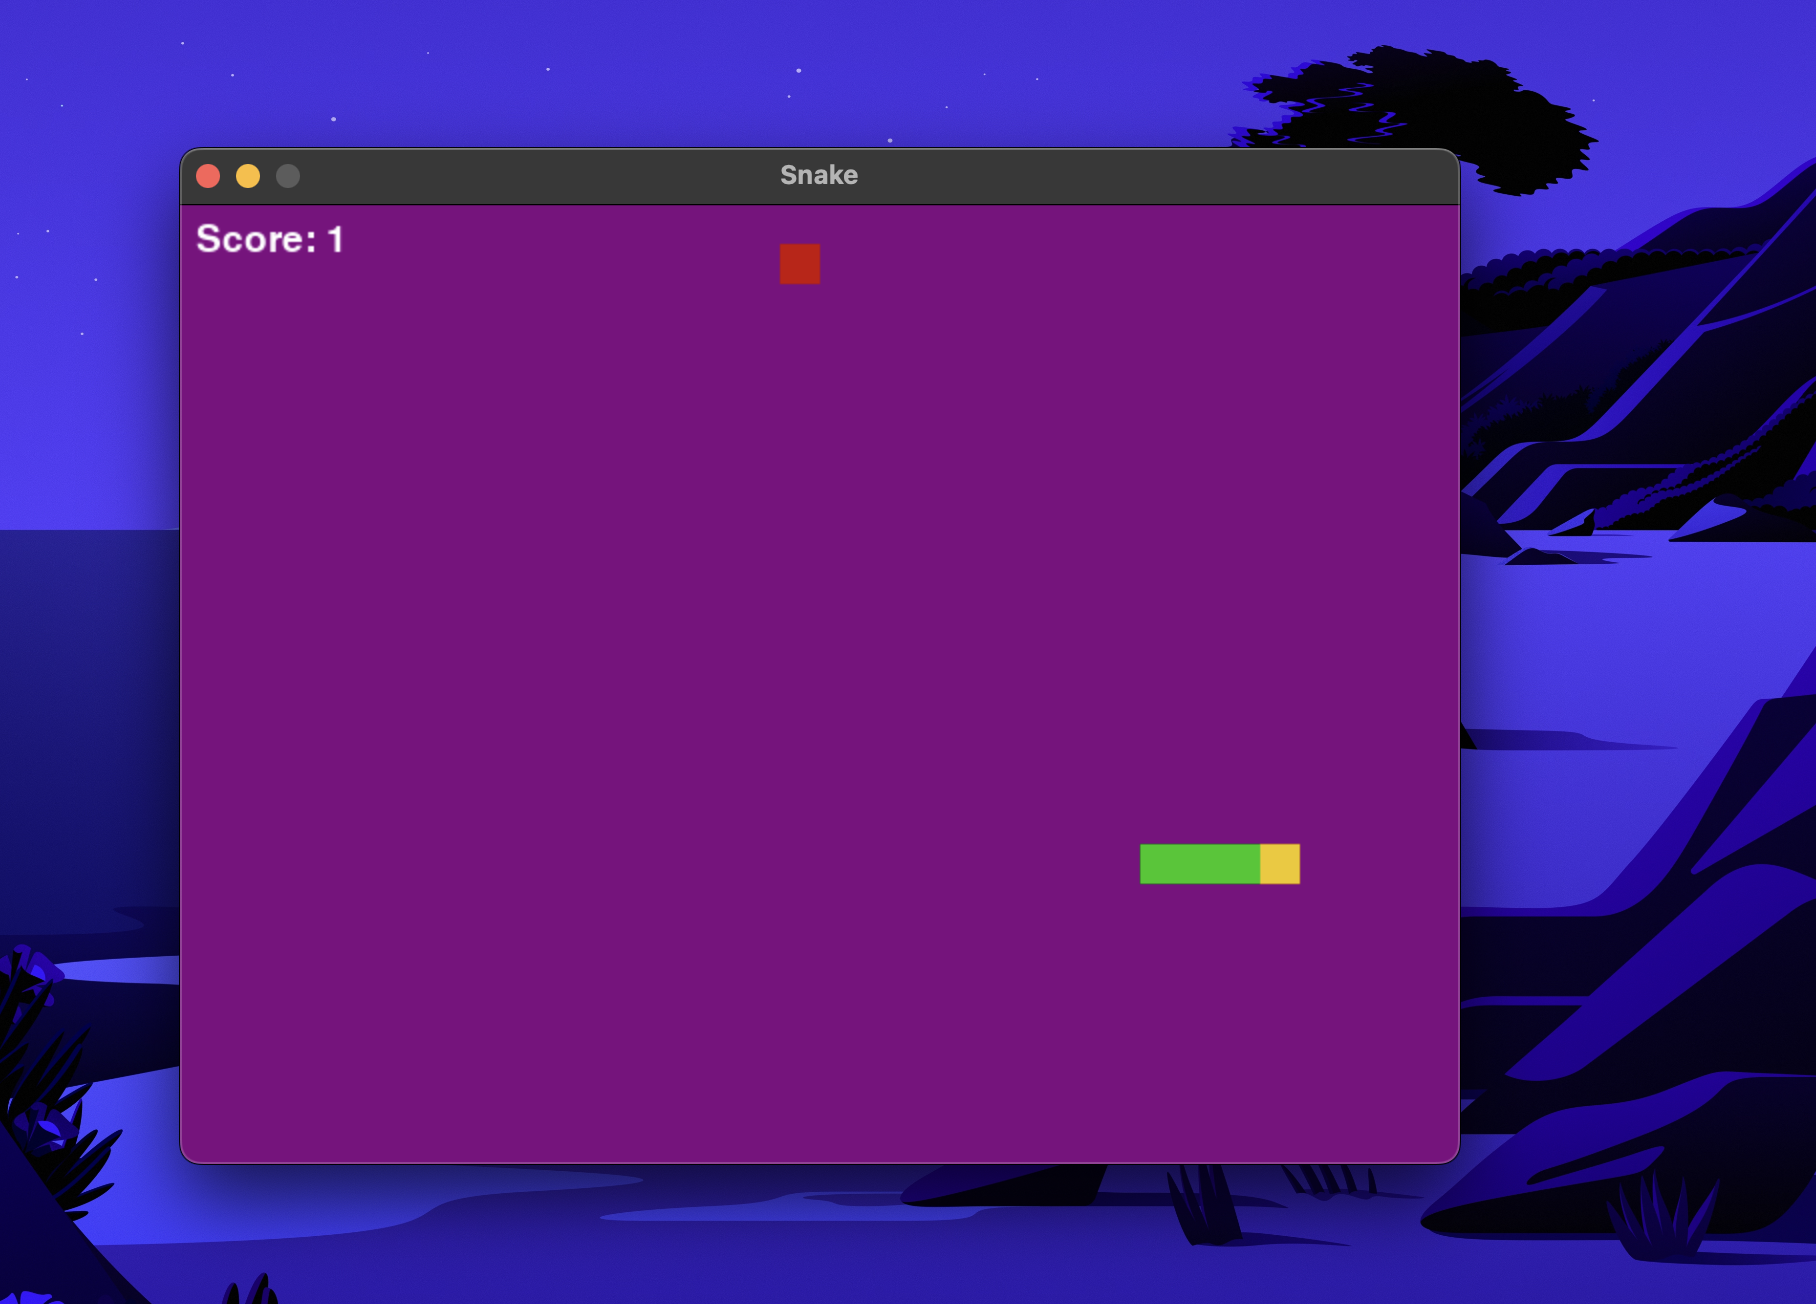

Lets reduce the speed of the snake

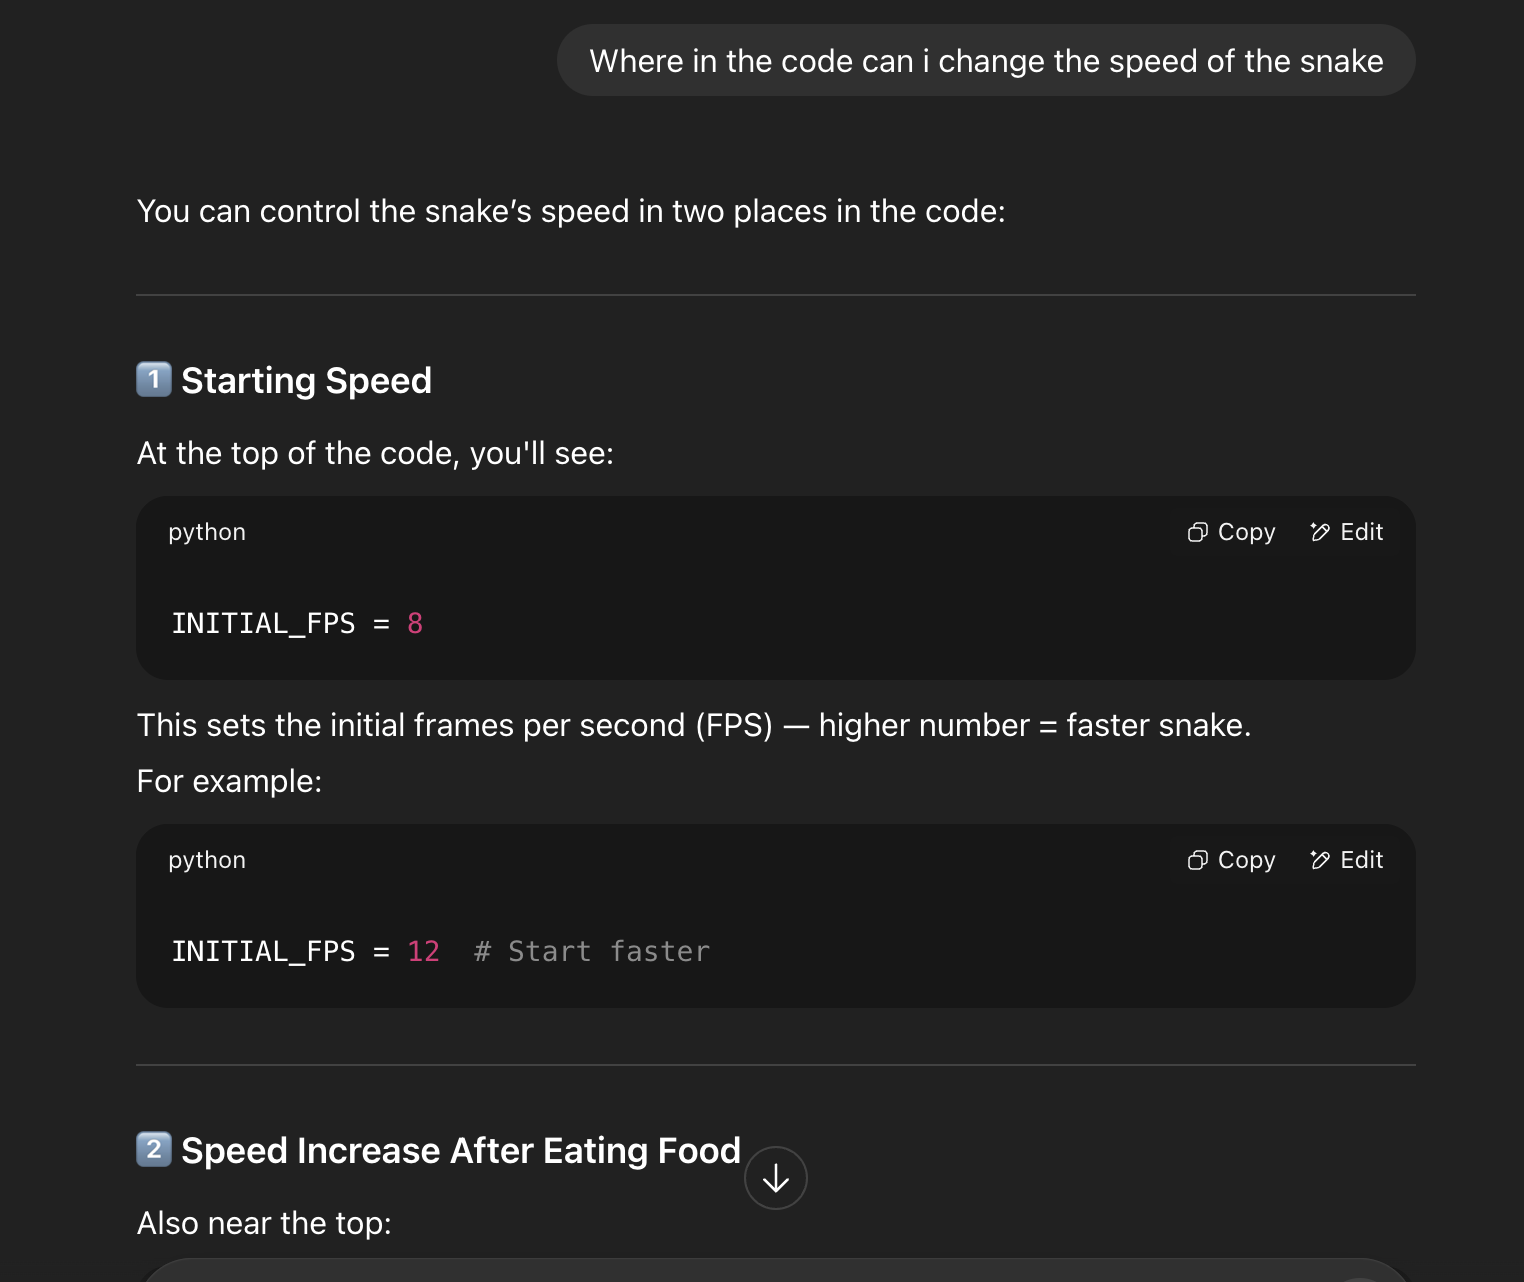

In [4]:
# reducing speed of the snake


import pygame
import sys
import random

# --- Configuration ---
CELL_SIZE = 20
GRID_WIDTH = 32  # 32 * 20 = 640
GRID_HEIGHT = 24  # 24 * 20 = 480
SCREEN_WIDTH = CELL_SIZE * GRID_WIDTH
SCREEN_HEIGHT = CELL_SIZE * GRID_HEIGHT

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 200, 0)
DARK_GREEN = (0, 150, 0)
RED = (200, 0, 0)
YELLOW = (240, 200, 0)

# Initial speed (frames per second)
INITIAL_FPS = 5
FPS_INCREMENT = 0.5  # increase in fps per food

# --- Helper functions ---

def random_food_position(snake):
    """Return a food position not colliding with the snake."""
    while True:
        x = random.randint(0, GRID_WIDTH - 1)
        y = random.randint(0, GRID_HEIGHT - 1)
        if (x, y) not in snake:
            return (x, y)


def draw_cell(surface, pos, color):
    rect = pygame.Rect(pos[0] * CELL_SIZE, pos[1] * CELL_SIZE, CELL_SIZE, CELL_SIZE)
    pygame.draw.rect(surface, color, rect)


# --- Game class ---
class SnakeGame:
    def __init__(self):
        pygame.init()
        pygame.display.set_caption('Snake')
        self.screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
        self.clock = pygame.time.Clock()
        self.font = pygame.font.SysFont(None, 28)
        self.big_font = pygame.font.SysFont(None, 64)
        self.reset()

    def reset(self):
        # Snake starts in the center moving right
        cx = GRID_WIDTH // 2
        cy = GRID_HEIGHT // 2
        self.snake = [(cx - i, cy) for i in range(3)]  # head is snake[0]
        self.direction = (1, 0)  # dx, dy
        self.next_direction = self.direction
        self.food = random_food_position(self.snake)
        self.score = 0
        self.fps = INITIAL_FPS
        self.game_over = False
        self.paused = False

    def handle_event(self, event):
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_ESCAPE:
                pygame.quit()
                sys.exit()
            if event.key in (pygame.K_p, pygame.K_SPACE):
                self.paused = not self.paused
            if self.game_over and event.key == pygame.K_r:
                self.reset()
            # Movement keys: check to prevent reverse
            if event.key in (pygame.K_UP, pygame.K_w):
                if self.direction != (0, 1):
                    self.next_direction = (0, -1)
            elif event.key in (pygame.K_DOWN, pygame.K_s):
                if self.direction != (0, -1):
                    self.next_direction = (0, 1)
            elif event.key in (pygame.K_LEFT, pygame.K_a):
                if self.direction != (1, 0):
                    self.next_direction = (-1, 0)
            elif event.key in (pygame.K_RIGHT, pygame.K_d):
                if self.direction != (-1, 0):
                    self.next_direction = (1, 0)

    def update(self):
        if self.game_over or self.paused:
            return

        self.direction = self.next_direction
        new_head = (self.snake[0][0] + self.direction[0], self.snake[0][1] + self.direction[1])

        # Check wall collision
        if not (0 <= new_head[0] < GRID_WIDTH and 0 <= new_head[1] < GRID_HEIGHT):
            self.game_over = True
            return

        # Check self collision
        if new_head in self.snake:
            self.game_over = True
            return

        # Move snake
        self.snake.insert(0, new_head)

        # Check food
        if new_head == self.food:
            self.score += 1
            # Increase difficulty slightly
            self.fps += FPS_INCREMENT
            self.food = random_food_position(self.snake)
        else:
            self.snake.pop()

    def draw_grid(self):
        # optional: draw faint grid
        for x in range(0, SCREEN_WIDTH, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (x, 0), (x, SCREEN_HEIGHT))
        for y in range(0, SCREEN_HEIGHT, CELL_SIZE):
            pygame.draw.line(self.screen, (40, 40, 40), (0, y), (SCREEN_WIDTH, y))

    def draw(self):
        self.screen.fill((128, 0, 128))  # Black to purple
        # self.draw_grid()

        # Draw food
        draw_cell(self.screen, self.food, RED)

        # Draw snake (head brighter)
        for i, pos in enumerate(self.snake):
            color = YELLOW if i == 0 else GREEN
            draw_cell(self.screen, pos, color)

        # Draw score
        score_surf = self.font.render(f'Score: {self.score}', True, WHITE)
        self.screen.blit(score_surf, (8, 8))

        if self.paused:
            pause_surf = self.big_font.render('PAUSED', True, WHITE)
            rect = pause_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2))
            self.screen.blit(pause_surf, rect)

        if self.game_over:
            go_surf = self.big_font.render('GAME OVER', True, WHITE)
            go_rect = go_surf.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 - 30))
            self.screen.blit(go_surf, go_rect)

            info = self.font.render('Press R to restart or ESC to quit', True, WHITE)
            info_rect = info.get_rect(center=(SCREEN_WIDTH // 2, SCREEN_HEIGHT // 2 + 30))
            self.screen.blit(info, info_rect)

        pygame.display.flip()

    def run(self):
        while True:
            for event in pygame.event.get():
                self.handle_event(event)

            self.update()
            self.draw()

            # Tick
            self.clock.tick(self.fps)


if __name__ == '__main__':
    game = SnakeGame()
    game.run()


SystemExit: 

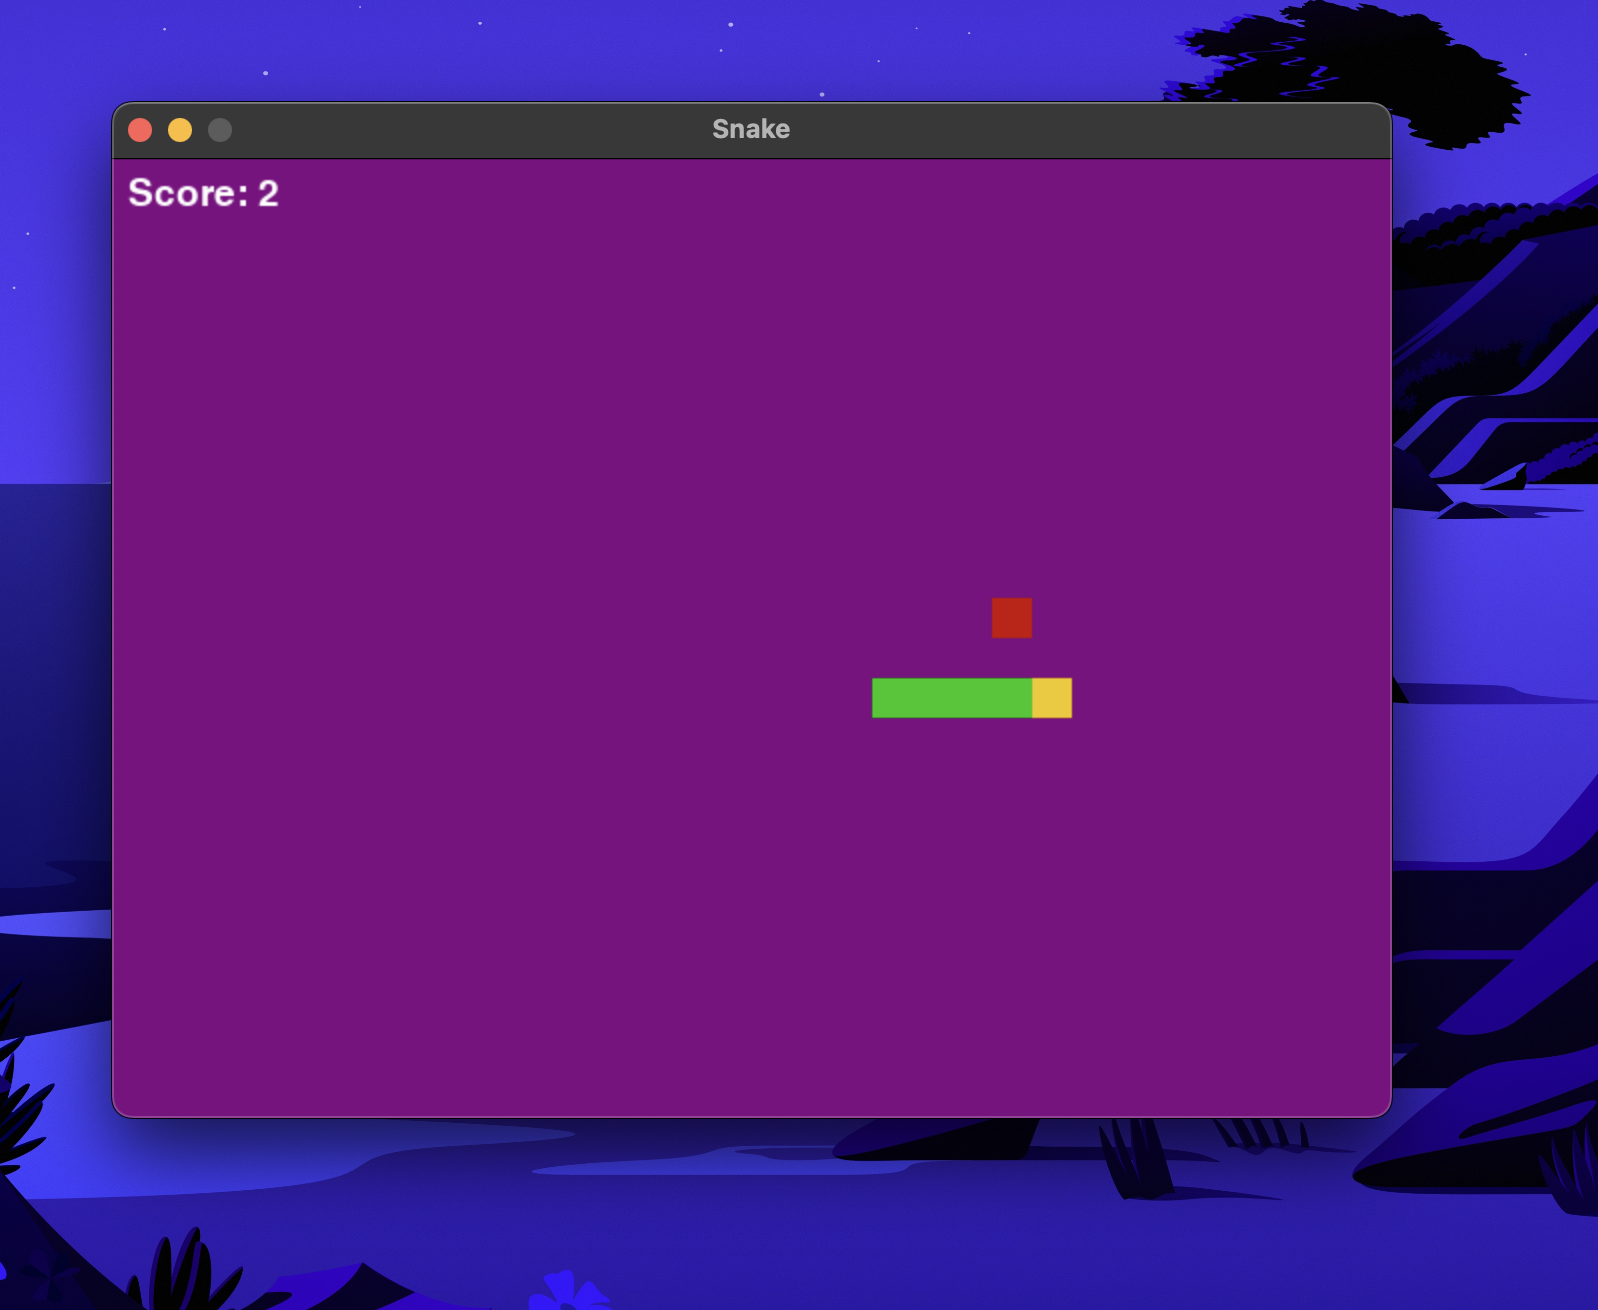